<p align="center">
<img src='../../img/VerticaMLPython.png' width="180px">
</p>

# Vertica ML Python Exercise 11

During this exercice, we will:
<ul>
    <li> Build a Logistic Regression model
    <li> Split the data
    <li> Evaluate the model with different metrics
    <li> Compute the model features importance
</ul>
## Initialization

Let's create a cursor using the vertica_cursor function.

In [1]:
from vertica_ml_python.utilities import vertica_cursor
cur = vertica_cursor("VerticaDSN")

During this study, we will work with the titanic dataset.

In [2]:
from vertica_ml_python import vDataframe
titanic = vDataframe('titanic', cur)

We will first prepare the data using the following commands.

In [3]:
from vertica_ml_python.utilities import drop_view
drop_view("titanic_clean", cur)

titanic["sex"].label_encode().eval("family_size", expr = "parch + sibsp + 1").drop(
    columns = ["cabin", "body", "ticket", "home.dest", "name", "embarked", "sibsp", "parch", "boat"])["fare"].fill_outliers(
    ).fillna().to_db("titanic_clean") 

The view titanic_clean was successfully dropped.
The new vColumn "family_size" was added to the vDataframe.
vColumn '"cabin"' deleted from the vDataframe.
vColumn '"body"' deleted from the vDataframe.
vColumn '"ticket"' deleted from the vDataframe.
vColumn '"home.dest"' deleted from the vDataframe.
vColumn '"name"' deleted from the vDataframe.
vColumn '"embarked"' deleted from the vDataframe.
vColumn '"sibsp"' deleted from the vDataframe.
vColumn '"parch"' deleted from the vDataframe.
vColumn '"boat"' deleted from the vDataframe.


,age,survived,sex,pclass,fare,family_size
0,2.0000000000000,0,0,1,151.5500000000000,4
1,30.0000000000000,0,1,1,151.5500000000000,4
2,25.0000000000000,0,0,1,151.5500000000000,4
3,39.0000000000000,0,1,1,0E-13,1
4,71.0000000000000,0,1,1,49.5042000000000,1
,...,...,...,...,...,...


<object>  Name: titanic, Number of rows: 1234, Number of columns: 6

We created the following features:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>survived:</b> 1 if the passenger survived, 0 otherwise</li>
    <li><b>sex:</b> 1 = male, 0 = female</li>
    <li><b>pclass:</b> Passenger class (1,2 or 3)</li>
    <li><b>fare:</b> The ticket fare </li>
    <li><b>family_size:</b> The size of the passenger family</li>
</ul>

The purpose is to predict the passengers survival using the previous features.

## Classification

Let's explore the dataset by displaying descriptive statistics of all the columns.

In [4]:
titanic.describe()

,count,mean,std,min,25%,50%,75%,max,unique
age,1234,30.1524573721163,12.9740056939445,0.33,23.0,30.1524573721163,35.75,80.0,97
family_size,1234,1.88249594813614,1.58407574155133,1.0,1.0,1.0,2.0,11.0,9
fare,1234,32.9113074018842,45.7069936348505,0.0,7.8958,14.4542,31.3875,244.548085606483,275
pclass,1234,2.28444084278768,0.842485636190292,1.0,1.0,3.0,3.0,3.0,3
sex,1234,0.659643435980551,0.474021160833511,0.0,0.0,1.0,1.0,1.0,2
survived,1234,0.364667747163696,0.481532018641288,0.0,0.0,0.0,1.0,1.0,2


<object>

<b>Question 1: </b>Split the dataset into a training and a testing.

In [5]:
from vertica_ml_python.learn.model_selection import train_test_split
train, test = train_test_split("titanic_clean", cur)

<b>Question 2: </b>Create a Logistic Regression model.

In [6]:
from vertica_ml_python.learn.linear_model import LogisticRegression
from vertica_ml_python.utilities import drop_model

drop_model("logit_titanic", cur)
model = LogisticRegression("logit_titanic", cur)
model.fit(train, ["age", "family_size", "fare", "pclass", "sex"], "survived", test)

The model logit_titanic was successfully dropped.




details
 predictor |coefficient|std_err |z_value |p_value 
-----------+-----------+--------+--------+--------
 Intercept |  0.30908  | 0.43438| 0.71154| 0.47675
    age    | -0.01778  | 0.00627|-2.83616| 0.00457
family_size| -0.03129  | 0.04981|-0.62832| 0.52979
   fare    |  0.01484  | 0.00323| 4.60010| 0.00000
  pclass   | -0.06151  | 0.12376|-0.49701| 0.61918
    sex    | -0.10640  | 0.15864|-0.67074| 0.50239


regularization
type| lambda 
----+--------
 l2 | 1.00000


call_string
logistic_reg('public.logit_titanic', 'vpython_train_test_split_titanic_clean_67', '"survived"', '"age", "family_size", "fare", "pclass", "sex"'
USING PARAMETERS optimizer='cgd', epsilon=0.0001, max_iterations=100, regularization='l2', lambda=1, alpha=0)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  |  4  
rejected_row_count|  0  
accepted_row_count| 830 

<b>Question 3: </b>Look at the model coef attribute and see what features you should eliminate if you decide to build another Logistic Regression model. 

In [7]:
model.coef

,predictor,coefficient,std_err,z_value,p_value
0,Intercept,0.309077180140092,0.434375466113932,0.711543823837933,0.47674730413706
1,age,-0.0177837572206736,0.00627037446669004,-2.83615553028704,0.00456602043835669
2,family_size,-0.0312936320892188,0.0498050141617346,-0.628322923222092,0.529792417815454
3,fare,0.0148381090793237,0.00322560716367948,4.60009800523811,4.22292213975346e-06
4,pclass,-0.0615087104179321,0.123757500939108,-0.497009958597951,0.619182028695597
5,sex,-0.106404321791615,0.15863793476248,-0.670736932820814,0.502388130471633


<object>

<p style="color:red">The p-values of pclass/sex/family_size are really high, we can exclude them in a next similar model.</p>

<b>Question 4: </b>Look at the features importance and confirm the hypothesis.

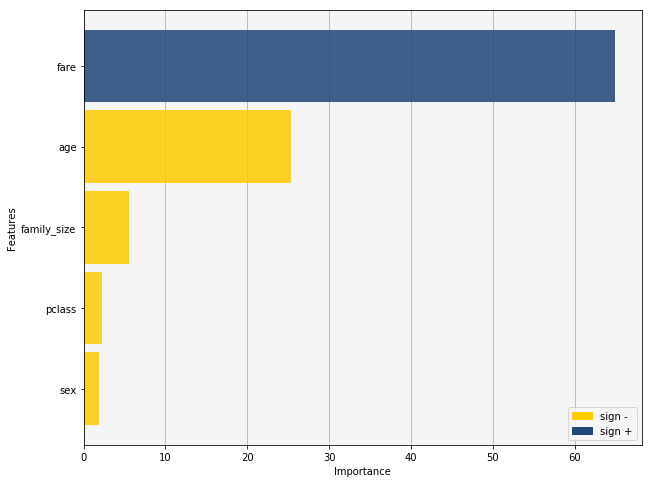

,importance
fare,64.94
age,25.36
family_size,5.6
pclass,2.2
sex,1.9


<object>

In [8]:
%matplotlib inline
model.features_importance()

<b>Question 5: </b>Draw the ROC Curve, PRC Curve and compute a classification report. What can you say about your model ? How can you solve this problem using the same features ?

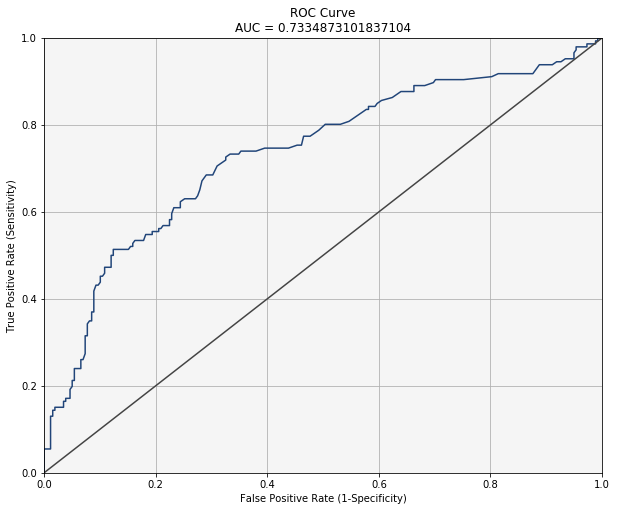

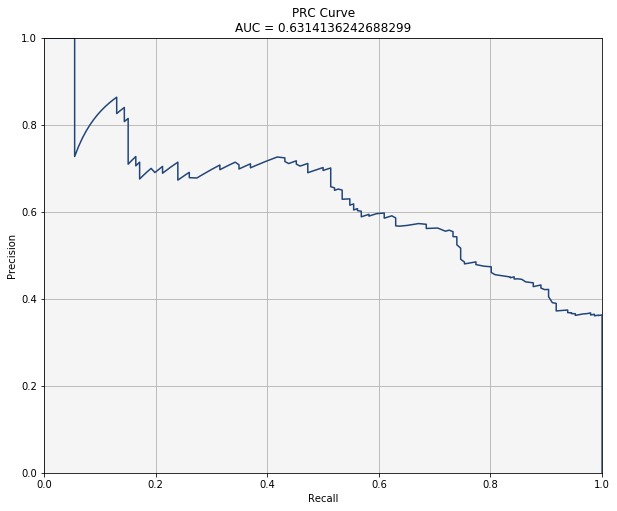

,value
auc,0.7339651693745362
prc_auc,0.6316984673917608
accuracy,0.725247524752475
log_loss,0.269850136398487
precision,0.5205479452054794
recall,0.6495726495726496
f1-score,0.6987987542636808
mcc,0.3830193508013074
informedness,0.40567021054825947
markedness,0.36163321652330893


<object>

In [9]:
model.roc_curve()
model.prc_curve()
model.classification_report()

<p style="color:red">The model is not good enough. Using the same features, we should probably do some parameters tuning in order to find more appropriate model parameters.</p>